In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
bus = pd.read_csv('bus.csv', encoding='ISO-8859-1').rename(columns = {'business id column':'bid'})
ins = pd.read_csv('ins.csv')
ins2vio = pd.read_csv('ins2vio.csv')
vio = pd.read_csv('vio.csv')
legend = pd.read_csv('legend.csv')
review_data = pd.read_csv('rating_review_bus_id.csv', index_col = 0)


In [52]:
review_data.head()

,name,display_address,rating,review_count,price,latitude,longitude,bid,type
0,Bi-Rite Creamery,"3692 18th St, San Francisco, CA 94110",4.5,9842,$$,37.761504,-122.425817,23865,Ice Cream & Frozen Yogurt
1,Mitchells Ice Cream,"688 San Jose Ave, San Francisco, CA 94110",4.5,4445,$,37.744122,-122.422722,5032,Ice Cream & Frozen Yogurt
2,House of Prime Rib,"1906 Van Ness Ave, San Francisco, CA 94109",4.0,7912,$$$,37.793338,-122.422827,3350,American (Traditional)
3,Burma Superstar,"309 Clement St, San Francisco, CA 94118",4.0,7145,$$,37.783004,-122.462539,1977,Burmese
4,B Patisserie,"2821 California St, San Francisco, CA 94115",4.5,3006,$$,37.788014,-122.440756,71696,Bakeries


In [69]:
select_businesses = review_data.bid.unique()
select_businesses

array([ 23865,   5032,   3350,   1977,  71696,   2858,  67330,  18921,
         2356,   1595,  64021,  80931,  81264,    847,  80312,  58879,
         2893,  63897,   2172,  36730,   2360,  90147,  79704,  70184,
        80201,  68152,   3926,  82413,   3186,   3800,   3626,  87404,
        86486,   3643,   4671,  88539,  82944,  33710,    639,  80081,
        94605,  77462,  63304,  38566,  69403,  61136,  28318,  36277,
        97483,  62701,  91987,   3611,  78781,  14075,  65898, 100039,
        36494,  62251,  80619,  80621,  80624,  63597,  82074,  61326,
        75429,  33709,  66925,  80063,   3324,  94578,   3228,  78601,
        89128,  59009,  59154,  91984,  87122,    856,  78727,  65860,
         3484,  78403,   3206,   3690,  68331,  63413,  61351,  27964,
         3016,  68894,  80120,  91042,  36840,  70064,  34726,  82955,
         2593,  69799,  85670,   3053,  89475,   3495,  96588,    486,
          840,  87765,  75147,  63191,   2315,  33911,  65549,  74239,
      

## Inspection Data

In [65]:
ins['bid'] = ins['iid'].str.extract(r'(\d+)').astype(int)
ins['timestamp'] = pd.to_datetime(ins.date)
ins['year'] = ins['timestamp'].dt.year
ins

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019
...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


In [74]:
ins

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019
...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


In [73]:
select_ins = ins.loc[[i in select_businesses for i in ins['bid']], :]
select_ins

,iid,date,score,type,bid,timestamp,year
9,100036_20190325,03/25/2019 12:00:00 AM,-1,Structural Inspection,100036,2019-03-25,2019
10,100036_20190531,05/31/2019 12:00:00 AM,-1,New Ownership - Followup,100036,2019-05-31,2019
11,100036_20190906,09/06/2019 12:00:00 AM,-1,New Ownership,100036,2019-09-06,2019
12,100039_20190607,06/07/2019 12:00:00 AM,-1,New Ownership,100039,2019-06-07,2019
95,100210_20190508,05/08/2019 12:00:00 AM,-1,New Ownership,100210,2019-05-08,2019
...,...,...,...,...,...,...,...
26562,99740_20190318,03/18/2019 12:00:00 AM,-1,New Ownership - Followup,99740,2019-03-18,2019
26563,99740_20190425,04/25/2019 12:00:00 AM,96,Routine - Unscheduled,99740,2019-04-25,2019
26577,99761_20190711,07/11/2019 12:00:00 AM,70,Routine - Unscheduled,99761,2019-07-11,2019
26578,99761_20190716,07/16/2019 12:00:00 AM,-1,Reinspection/Followup,99761,2019-07-16,2019


In [77]:
select_ins.loc[select_ins['score']>0, :]

,iid,date,score,type,bid,timestamp,year
219,100504_20190411,04/11/2019 12:00:00 AM,88,Routine - Unscheduled,100504,2019-04-11,2019
334,100992_20190822,08/22/2019 12:00:00 AM,88,Routine - Unscheduled,100992,2019-08-22,2019
696,102398_20190813,08/13/2019 12:00:00 AM,90,Routine - Unscheduled,102398,2019-08-13,2019
789,1043_20171116,11/16/2017 12:00:00 AM,87,Routine - Unscheduled,1043,2017-11-16,2017
790,1043_20180928,09/28/2018 12:00:00 AM,83,Routine - Unscheduled,1043,2018-09-28,2018
...,...,...,...,...,...,...,...
26388,99268_20190531,05/31/2019 12:00:00 AM,85,Routine - Unscheduled,99268,2019-05-31,2019
26407,99298_20190605,06/05/2019 12:00:00 AM,84,Routine - Unscheduled,99298,2019-06-05,2019
26459,99421_20190729,07/29/2019 12:00:00 AM,73,Routine - Unscheduled,99421,2019-07-29,2019
26563,99740_20190425,04/25/2019 12:00:00 AM,96,Routine - Unscheduled,99740,2019-04-25,2019


<AxesSubplot:>

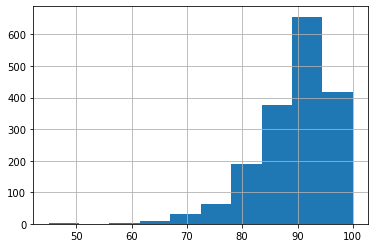

In [84]:
select_scores = select_ins.loc[select_ins['score']>0, :]
select_scores['score'].hist()

In [79]:
select_ins.to_csv('ins2.csv', index = False)

### Pivot Table

In [78]:
ins_pivot = pd.pivot_table(select_ins, index = 'type', columns = 'year', aggfunc = 'size', fill_value = 0)
ins_pivot['Total'] = ins_pivot.sum(axis=1)
ins_pivot_sorted = ins_pivot.sort_values('Total', ascending = False )

ins_pivot_sorted

year,2016,2017,2018,2019,Total
type,,,,,
Routine - Unscheduled,136,469,589,554,1748
Reinspection/Followup,56,228,286,318,888
Complaint,14,62,85,62,223
New Ownership,8,45,45,37,135
Non-inspection site visit,5,28,30,36,99
New Construction,18,36,31,5,90
New Ownership - Followup,0,2,25,12,39
Complaint Reinspection/Followup,4,12,11,11,38
Foodborne Illness Investigation,0,9,11,10,30


In [48]:
ins_named = pd.merge(left = ins, right = bus[['bid', 'name', 'address']], how = 'left', on = 'bid')
ins_named.head()

,iid,date,score,type,bid,timestamp,year,name,address
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,AMICI'S EAST COAST PIZZERIA,475 06th St
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,AMICI'S EAST COAST PIZZERIA,475 06th St
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,AMICI'S EAST COAST PIZZERIA,475 06th St


## Review Data

In [62]:
d1 = review_data.query("price == '$'")
d2 = review_data.query("price == '$$'")
d3 = review_data.query("price == '$$$'")
d4 = review_data.query("price == '$$$$'")
display(d1.head(), d2.head(), d3.head(), d4.head())

,name,display_address,rating,review_count,price,latitude,longitude,bid,type
1,Mitchells Ice Cream,"688 San Jose Ave, San Francisco, CA 94110",4.5,4445,$,37.744122,-122.422722,5032,Ice Cream & Frozen Yogurt
8,El Farolito,"2779 Mission St, San Francisco, CA 94110",4.0,5184,$,37.752634,-122.418486,2356,Mexican
13,Golden Boy Pizza,"542 Green St, San Francisco, CA 94133",4.5,3970,$,37.799648,-122.408033,847,Pizza
14,Saigon Sandwich,"560 Larkin St, San Francisco, CA 94102",4.5,3503,$,-9999.000000,-9999.000000,80312,Vietnamese
17,Bob's Donuts & Pastry Shop,"1621 Polk St, San Francisco, CA 94109",4.5,3404,$,37.791914,-122.420984,63897,Bakeries


,name,display_address,rating,review_count,price,latitude,longitude,bid,type
0,Bi-Rite Creamery,"3692 18th St, San Francisco, CA 94110",4.5,9842,$$,37.761504,-122.425817,23865,Ice Cream & Frozen Yogurt
3,Burma Superstar,"309 Clement St, San Francisco, CA 94118",4.0,7145,$$,37.783004,-122.462539,1977,Burmese
4,B Patisserie,"2821 California St, San Francisco, CA 94115",4.5,3006,$$,37.788014,-122.440756,71696,Bakeries
6,San Tung,"1031 Irving St, San Francisco, CA 94122",4.0,7497,$$,37.763891,-122.468805,67330,Chinese
9,Zazie,"941 Cole St, San Francisco, CA 94117",4.0,4860,$$,37.765343,-122.449914,1595,Breakfast & Brunch


,name,display_address,rating,review_count,price,latitude,longitude,bid,type
2,House of Prime Rib,"1906 Van Ness Ave, San Francisco, CA 94109",4.0,7912,$$$,37.793338,-122.422827,3350,American (Traditional)
5,Kokkari Estiatorio,"200 Jackson St, San Francisco, CA 94111",4.5,4843,$$$,37.796918,-122.399864,2858,Greek
7,Nopa,"560 Divisadero St, San Francisco, CA 94117",4.0,5233,$$$,37.774778,-122.437717,18921,American (New)
16,Foreign Cinema,"2534 Mission St, San Francisco, CA 94110",4.0,5156,$$$,37.756417,-122.418884,2893,Breakfast & Brunch
19,Chapeau,"126 Clement St, San Francisco, CA 94118",4.5,2820,$$$,37.783148,-122.460661,36730,French


,name,display_address,rating,review_count,price,latitude,longitude,bid,type
84,KUSAKABE,"584 Washington St, San Francisco, CA 94111",4.5,977,$$$$,-9999.000000,-9999.000000,78403,Sushi Bars
87,Oma San Francisco Station,"1737 Post St, Ste 337, San Francisco, CA 94115",4.5,253,$$$$,37.785457,-122.430317,3690,Sushi Bars
98,Spruce,"3640 Sacramento St, San Francisco, CA 94118",4.0,2086,$$$$,37.787478,-122.452723,34726,American (Traditional)
103,Harris' Restaurant,"2100 Van Ness Ave, San Francisco, CA 94109",4.0,1980,$$$$,37.795058,-122.423147,3053,Steakhouses
111,Alexander's Steakhouse,"448 Brannan St, San Francisco, CA 94107",4.0,1832,$$$$,37.779153,-122.395569,63191,Steakhouses


In [80]:
review_data['rating'].value_counts()

4.0    461
4.5    237
3.5     75
5.0     12
Name: rating, dtype: int64

In [106]:
scores_ratings = select_scores.merge(review_data, on = 'bid', how = 'inner')
scores_ratings.head()

,iid,date,score,type_x,bid,timestamp,year,name,display_address,rating,review_count,price,latitude,longitude,type_y
0,100504_20190411,04/11/2019 12:00:00 AM,88,Routine - Unscheduled,100504,2019-04-11,2019,Holy Gelato!,"1392 9th Ave, San Francisco, CA 94122",4.5,1100,$$,-9999.000000,-9999.000000,Gelato
1,100992_20190822,08/22/2019 12:00:00 AM,88,Routine - Unscheduled,100992,2019-08-22,2019,District Tea,"2154 Mission St, San Francisco, CA 94110",4.5,324,$$,-9999.000000,-9999.000000,Bubble Tea
2,102398_20190813,08/13/2019 12:00:00 AM,90,Routine - Unscheduled,102398,2019-08-13,2019,Beit Rima,"138 Church St, San Francisco, CA 94114",4.5,549,$$,-9999.000000,-9999.000000,Arabic
3,1043_20171116,11/16/2017 12:00:00 AM,87,Routine - Unscheduled,1043,2017-11-16,2017,Central Coffee Tea & Spice,"1696 Hayes St, San Francisco, CA 94117",4.5,319,$,37.774198,-122.444214,Cafes
4,1043_20180928,09/28/2018 12:00:00 AM,83,Routine - Unscheduled,1043,2018-09-28,2018,Central Coffee Tea & Spice,"1696 Hayes St, San Francisco, CA 94117",4.5,319,$,37.774198,-122.444214,Cafes


In [111]:
scores_ratings["compound_rating"] = scores_ratings['rating']*scores_ratings['review_count']


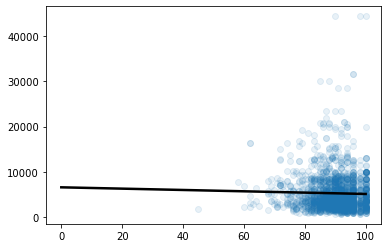

In [117]:
fig, ax = plt.subplots()
x, y = scores_ratings['score'], scores_ratings['compound_rating']
ax.scatter(x,y, alpha = 0.1)
xseq = np.linspace(0, 100, num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

In [114]:
b, a = np.polyfit(x, y, deg=1)